# Searching Bad Eiffel Tower Examples

This notebook attemps to find bad examples in the [QuickDraw dataset](https://github.com/googlecreativelab/quickdraw-dataset). In particular, we will try to find bad drawings of the Eiffel tower.

## Exploring the Data

Let's start by loading in the numpy array that contains images of the Eiffel tower. It's the first file found on [this storage bucket](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?prefix=&forceOnObjectsSortingFiltering=false). 

In [2]:
import numpy as np
X = np.load("The Eiffel Tower.npy", encoding='latin1', allow_pickle=True)

We can plot an example if we like.

There's a neat matplotlib trick that we might use here too. One that will allow us to draw many of these towers at a glance.

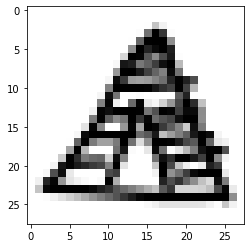

In [292]:
import matplotlib.pylab as plt

plt.imshow(X[23].reshape(28, 28), cmap="Greys")

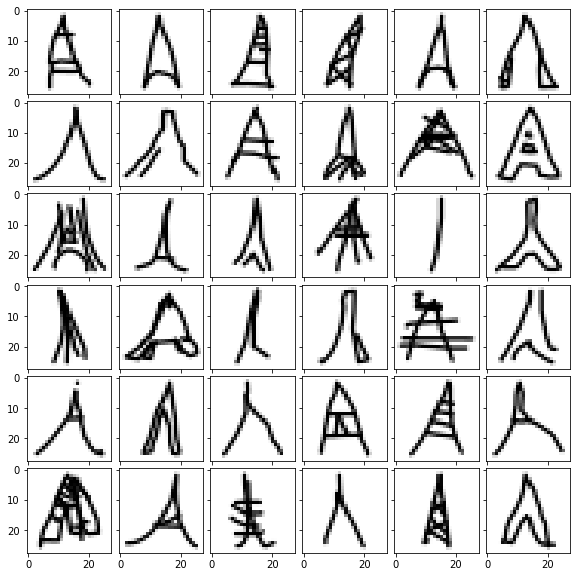

In [14]:
import random
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
gridsize = (6, 6)
grid = ImageGrid(fig, 111, nrows_ncols=gridsize, axes_pad=0.1)

for ax, idx in zip(grid, range(gridsize[0] * gridsize[1])):
    ax.imshow(X[np.random.randint(X.shape[0])].reshape(28, 28), cmap='Greys')

plt.show()

In [6]:
X.shape

(134801, 784)

We're intereted in finding some of the examples in this dataset that might be "bad examples" of the Eiffel tower. We prefer not to go over all of the 134801 by hand though, so we'll need to do something clever beforehand. 

## The Trick 

Let us now do a little "trick". We may use [UMAP](https://umap-learn.readthedocs.io/en/latest/) to perform dimensionality reduction on our images. The goal is to end up with 2D arrays so that we may plot them. Our images can be represented by a Numpy array, but in general such an embedding can also be achieved by using a pretrained neural network. This array can be passed to UMAP to reduce the dimensions down to 2D. 

![](explain1.png)

UMAP is similar to PCA, but it's a bit different. Where PCA tries to capture the global clusters, UMAP tries to capture the local clusters more. This might make you wonder though, when we make a chart of the two-dimensional points ... what do we expect?

![](explain2.png)

If everything is from the same class, we'd expect everything to be in a single large cluster. However, if there are subclusters that appear ... that might indicate examples that don't really fit the main cluster. Those exampels might be of interest to explore!
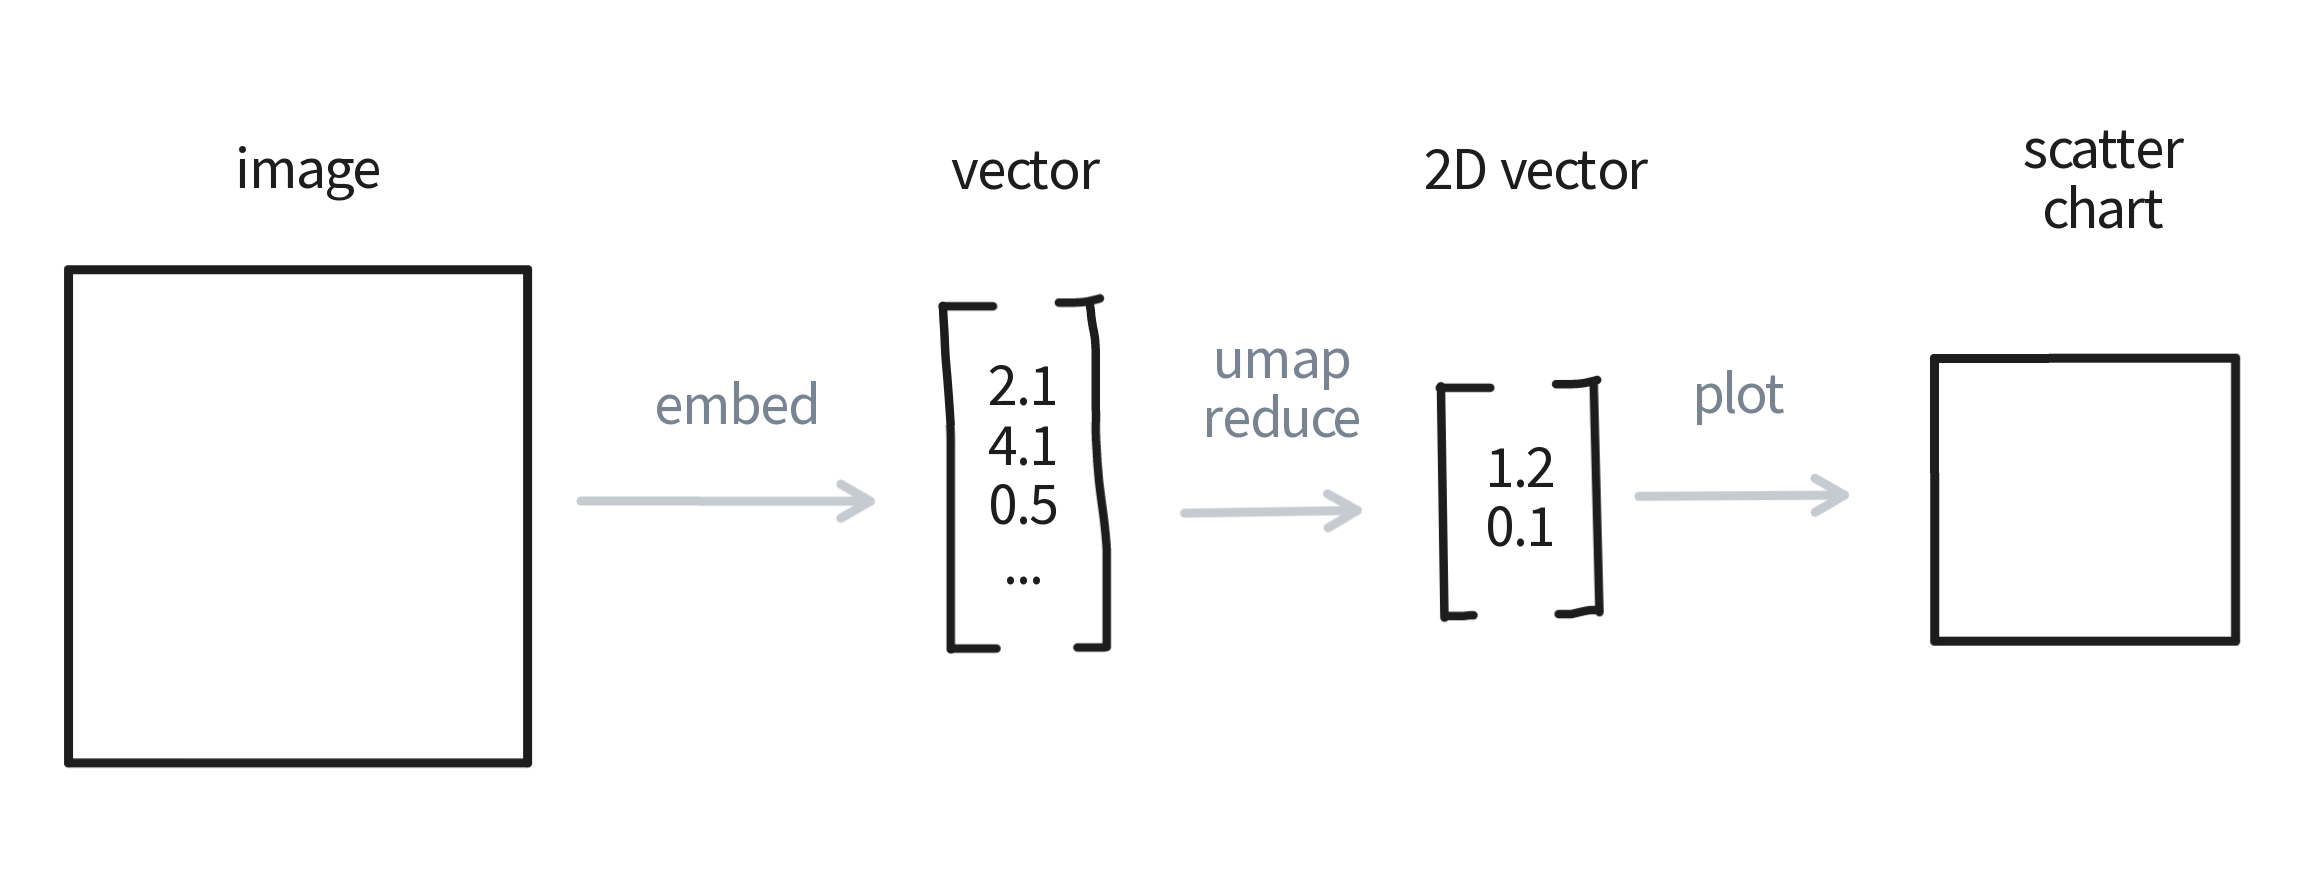
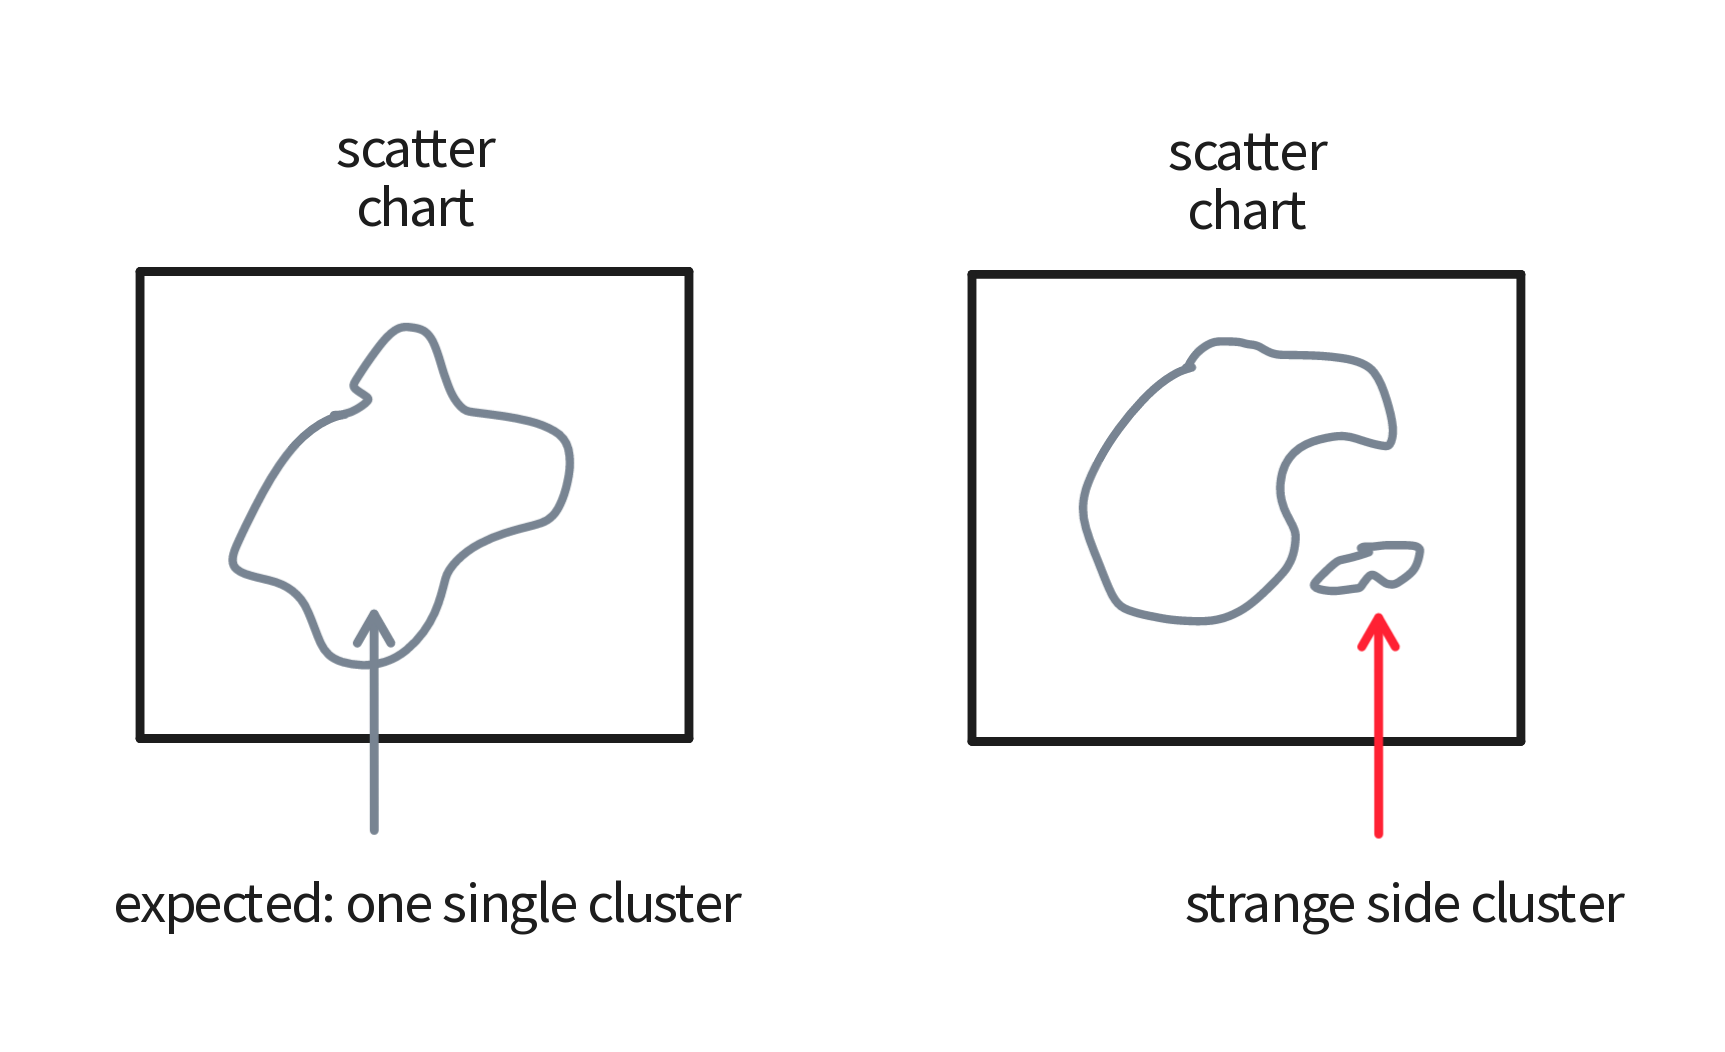

In [16]:
from umap import UMAP

In [17]:
%%time 

x_tfm = UMAP(n_components=2).fit_transform(X)

CPU times: user 9min 35s, sys: 1min 7s, total: 10min 43s
Wall time: 1min 7s


In [19]:
X.shape

(134801, 784)

In [21]:
x_tfm.shape

(134801, 2)

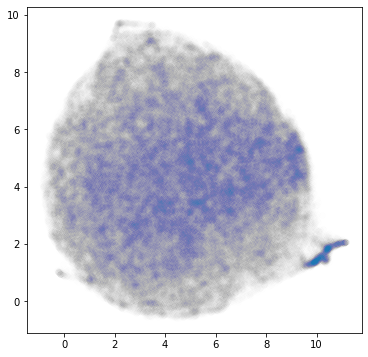

In [18]:
import matplotlib.pylab as plt 

plt.figure(figsize=(6, 6))
plt.scatter(x_tfm[:, 0], x_tfm[:, 1], alpha=0.002)

When we look at the cluster, it indeed seems it is not a "single blob". Let's zoom in on the area that contains the little "worm" shape.

In [23]:
x_bad = X[(x_tfm[:, 0] > 9) & (x_tfm[:, 1] < 2)]
coords = (10, 1.6)
predicate = (x_tfm[:, 0] < (coords[0] + 0.5)) & (x_tfm[:, 0] > (coords[0] - 0.5)) & (x_tfm[:, 1] < (coords[1] + 0.5)) & (x_tfm[:, 1] > (coords[1] - 0.5))
x_bad = X[predicate]

# Bad Examples

Let's now plot examples from this region.

In [24]:
bad_idx = np.arange(X.shape[0])[predicate]

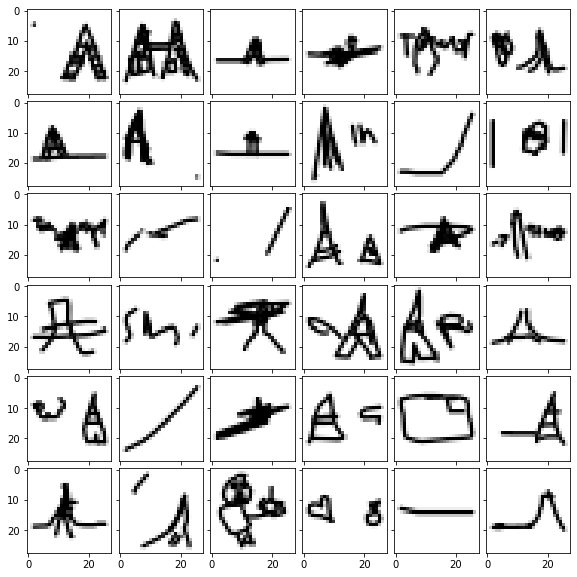

In [30]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
gridsize = (6, 6)
grid = ImageGrid(fig, 111, nrows_ncols=gridsize, axes_pad=0.1)

for ax, idx in zip(grid, range(gridsize[0] * gridsize[1])):
    ax.imshow(x_bad[np.random.randint(x_bad.shape[0])].reshape(28, 28), cmap='Greys')

plt.show()

Compared to the examples shown earlier, we can certainly confirm many of these examples are different. Some of the examples may be of the Eiffel tower, but certainly not all! 

## To Prodigy 

Let's now take the indices that we have found and let's put them in a `.jsonl` file that we can load with [Prodi.gy](https://prodi.gy/).

In [ ]:
from clumper import Clumper 

Clumper(list(bad_idx)).map(lambda d: {"idx": int(d)}).write_jsonl("eifel_tower_indices.jsonl")

## Inspect Data from Prodigy

In [3]:
from prodigy.components.db import connect 

db = connect()

In [7]:
# db.get_dataset("img-labels-single")

In [9]:
db.get_dataset("img-labels-cap")[-1]

{'options': [{'id': 941,
   'image': 'http://0.0.0.0:8000/generate/941',
   '_input_hash': -1861800004,
   '_task_hash': -133857179},
  {'id': 1025,
   'image': 'http://0.0.0.0:8000/generate/1025',
   '_input_hash': 29928298,
   '_task_hash': 715662628},
  {'id': 1221,
   'image': 'http://0.0.0.0:8000/generate/1221',
   '_input_hash': 403111525,
   '_task_hash': -1818877641},
  {'id': 1269,
   'image': 'http://0.0.0.0:8000/generate/1269',
   '_input_hash': -1694897798,
   '_task_hash': 1681965848},
  {'id': 1603,
   'image': 'http://0.0.0.0:8000/generate/1603',
   '_input_hash': 307460775,
   '_task_hash': -1546551087},
  {'id': 1637,
   'image': 'http://0.0.0.0:8000/generate/1637',
   '_input_hash': -1987545309,
   '_task_hash': -561232091},
  {'id': 1707,
   'image': 'http://0.0.0.0:8000/generate/1707',
   '_input_hash': -759572565,
   '_task_hash': 1794812570},
  {'id': 1745,
   'image': 'http://0.0.0.0:8000/generate/1745',
   '_input_hash': -1155390001,
   '_task_hash': 1914486151}